<a href="https://colab.research.google.com/github/yebiny/Lecture_deeplearning_basic/blob/main/5_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터
---

## 1. 데이터 불러오기

In [58]:
#MNIST tensorflow.keras
from tensorflow.keras import datasets
import numpy as np
import tensorflow as tf


In [59]:
cifar10_mnist = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## 2. 데이터 시각화 (EDA)

In [60]:
import matplotlib.pyplot as plt

* 이미지 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


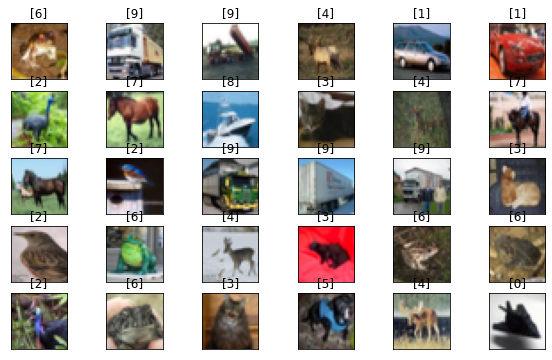

In [61]:
plt.figure(figsize=(10,6))         #이미지 사이즈 조절
for i in range(30):
  plt.subplot(5,6,i+1)
  img=x_train[i]
  label = y_train[i]
  plt.imshow(img, cmap ='gray')      #회색으로 변환
  plt.title(label)
  plt.xticks([])            #중간에 숫자 지우기
  plt.yticks([])
plt.show()

* 실제 데이터 확인

In [62]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


* 데이터 시각화

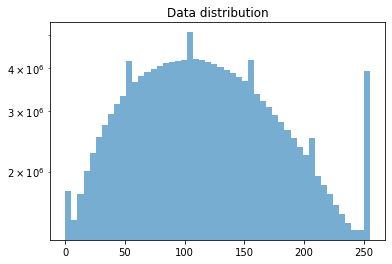

In [63]:
plt.title("Data distribution")
plt.hist(np.reshape(x_train, (50000*32*32*3)),log=True, bins=50, alpha=0.6)         #reshape(원하는 대상, 차원)
plt.show()

## 3. 데이터 전처리
  * 정규화
  * 원핫벡터


### **min max normalization**

# <center>$\frac{x-x_{min}}{x_{max}-x_{min}}$</center>

In [64]:
#x: np array

def minmax(x):
  x_min= np.min(x)
  x_max= np.max(x)
  return (x-x_min) / (x_max-x_min)

In [65]:
x_train_minmax = minmax(x_train)
x_test_minmax = minmax(x_test)
x_train_minmax.shape, x_test_minmax.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

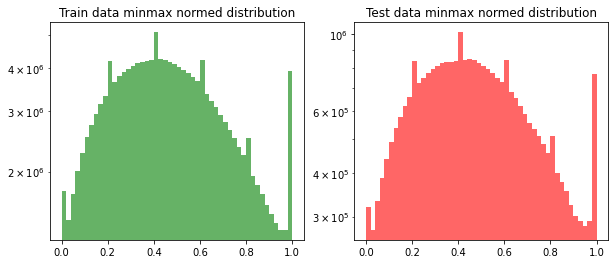

In [66]:
plt.figure(figsize=(10,4))                #전체 사이즈 조정
plt.subplot(1,2,1)
plt.title("Train data minmax normed distribution")
plt.hist(np.reshape(x_train_minmax, (50000*32*32*3)),log=True, bins=50, color='green', alpha=0.6)        #reshape(원하는 대상, 차원)

plt.subplot(1,2,2)
plt.title("Test data minmax normed distribution")
plt.hist(np.reshape(x_test_minmax, (10000*32*32*3)),log=True, bins=50, color='red',alpha=0.6)  #reshape(원하는 대상, 차원)
plt.show()

### **Z-Score Normalization**


# <center>$\frac{x-\bar{x}}{\sigma}$</center>

In [67]:
def z_score(x):
  x_mean= np.mean(x)
  x_std= np.std(x)

  return (x-x_mean) / x_std

In [68]:
x_train_z_score = z_score(x_train)
x_test_z_score = z_score(x_test)
x_train_z_score.shape, x_test_z_score.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

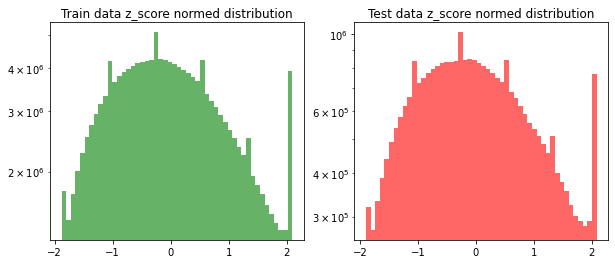

In [70]:
plt.figure(figsize=(10,4))                #전체 사이즈 조정
plt.subplot(1,2,1)
plt.title("Train data z_score normed distribution")
plt.hist(np.reshape(x_train_z_score, (50000*32*32*3)),log=True, bins=50, color='green', alpha=0.6)         #reshape(원하는 대상, 차원)

plt.subplot(1,2,2)
plt.title("Test data z_score normed distribution")
plt.hist(np.reshape(x_test_z_score, (10000*32*32*3)),log=True, bins=50, color='red',alpha=0.6)         #reshape(원하는 대상, 차원)

plt.show()

### **one-hot coding**

In [71]:
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


# 모델
---

## 1. 모델구현
---

In [72]:
from tensorflow.keras import models, layers, optimizers

### **Softmax regression**

In [78]:
sr = models.Sequential(name='Softmax_regression')
sr.add(layers.Flatten(input_shape = [32,32,3]))
sr.add(layers.Dense(10, activation='softmax'))
sr.summary()

Model: "Softmax_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


### **DNN**

In [80]:
dnn = models.Sequential(name='DNN')
# input layer
dnn.add(layers.Flatten(input_shape = [32,32,3]))
# hidden layer
dnn.add(layers.Dense(100, activation='relu'))
dnn.add(layers.Dense(100, activation='relu'))
# output layer  (고정)
dnn.add(layers.Dense(10, activation='softmax'))
dnn.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


### **CNN**

In [81]:
cnn = models.Sequential(name='CNN')
# x data :(32,32)->2차원
# dense : (764) -> 1차원
# convolution: (32,32,1) -> 3차원 (흑백이라 1, 컬러이면 3)

# input layer
cnn.add(layers.Reshape([32,32,3], input_shape = [32,32,3]))
# hidden layer
cnn.add(layers.Conv2D(10, kernel_size = 5, activation='relu'))  # output의 차원 (숫자 10 (임의))
cnn.add(layers.MaxPool2D(pool_size=3))
cnn.add(layers.Conv2D(10, kernel_size = 5, activation='relu'))  
cnn.add(layers.MaxPool2D(pool_size=3))

cnn.add(layers.Flatten())

# output layer  (고정)
cnn.add(layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 10)        760       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 10)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 10)          2510      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110     

## 2. 학습
---

### **Softmax Regression**

In [82]:
sr.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss= 'categorical_crossentropy',
           metrics=['acc'])
sr.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9498 - acc: 0.3026
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8434 - acc: 0.3544
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8178 - acc: 0.3622
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7947 - acc: 0.3730
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7805 - acc: 0.3803
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7718 - acc: 0.3815
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7642 - acc: 0.3869
Epoch 8/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7582 - acc: 0.3889
Epoch 9/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7533 - acc: 0.3909
Epoch 10/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7450 - acc: 0.3955
Epoch 11/20
1563/1563 [======

### **DNN**

In [83]:
dnn.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss= 'categorical_crossentropy',
           metrics=['acc'])
dnn.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9061 - acc: 0.3131
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7288 - acc: 0.3839
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6517 - acc: 0.4122
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5981 - acc: 0.4319
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5598 - acc: 0.4477
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5249 - acc: 0.4591
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4958 - acc: 0.4717
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4705 - acc: 0.4771
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4469 - acc: 0.4872
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4249 - acc: 0.4951
Epoch 11/20
1563/1563 [======

### CNN

In [84]:
cnn.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss= 'categorical_crossentropy',
           metrics=['acc'])
cnn.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 34s 22ms/step - loss: 2.1616 - acc: 0.2010
Epoch 2/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.9359 - acc: 0.2799
Epoch 3/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8282 - acc: 0.3182
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.7548 - acc: 0.3484
Epoch 5/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.7022 - acc: 0.3714
Epoch 6/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6592 - acc: 0.3926
Epoch 7/20
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6225 - acc: 0.4119
Epoch 8/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5906 - acc: 0.4274
Epoch 9/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5636 - acc: 0.4369
Epoch 10/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5407 - acc: 0.4469
Epoch 11/

## 3. 성능평가
---

### Softmax Regression

In [85]:
sr.evaluate(x_test_minmax, y_test_onehot)


313/313 [==============================] - 1s 1ms/step - loss: 1.7412 - acc: 0.4017


[1.741209626197815, 0.4016999900341034]

### DNN

In [86]:
dnn.evaluate(x_test_minmax, y_test_onehot)


313/313 [==============================] - 1s 2ms/step - loss: 1.4290 - acc: 0.4950


[1.4290099143981934, 0.4950000047683716]

### CNN

In [87]:
cnn.evaluate(x_test_minmax, y_test_onehot)


313/313 [==============================] - 3s 8ms/step - loss: 1.4559 - acc: 0.4738


[1.4558500051498413, 0.47380000352859497]